In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [02:22<00:00, 43.2MB/s]
100% 5.20G/5.20G [02:22<00:00, 39.2MB/s]


In [ ]:
!unzip /content/skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

# Adding image path to the csv file

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


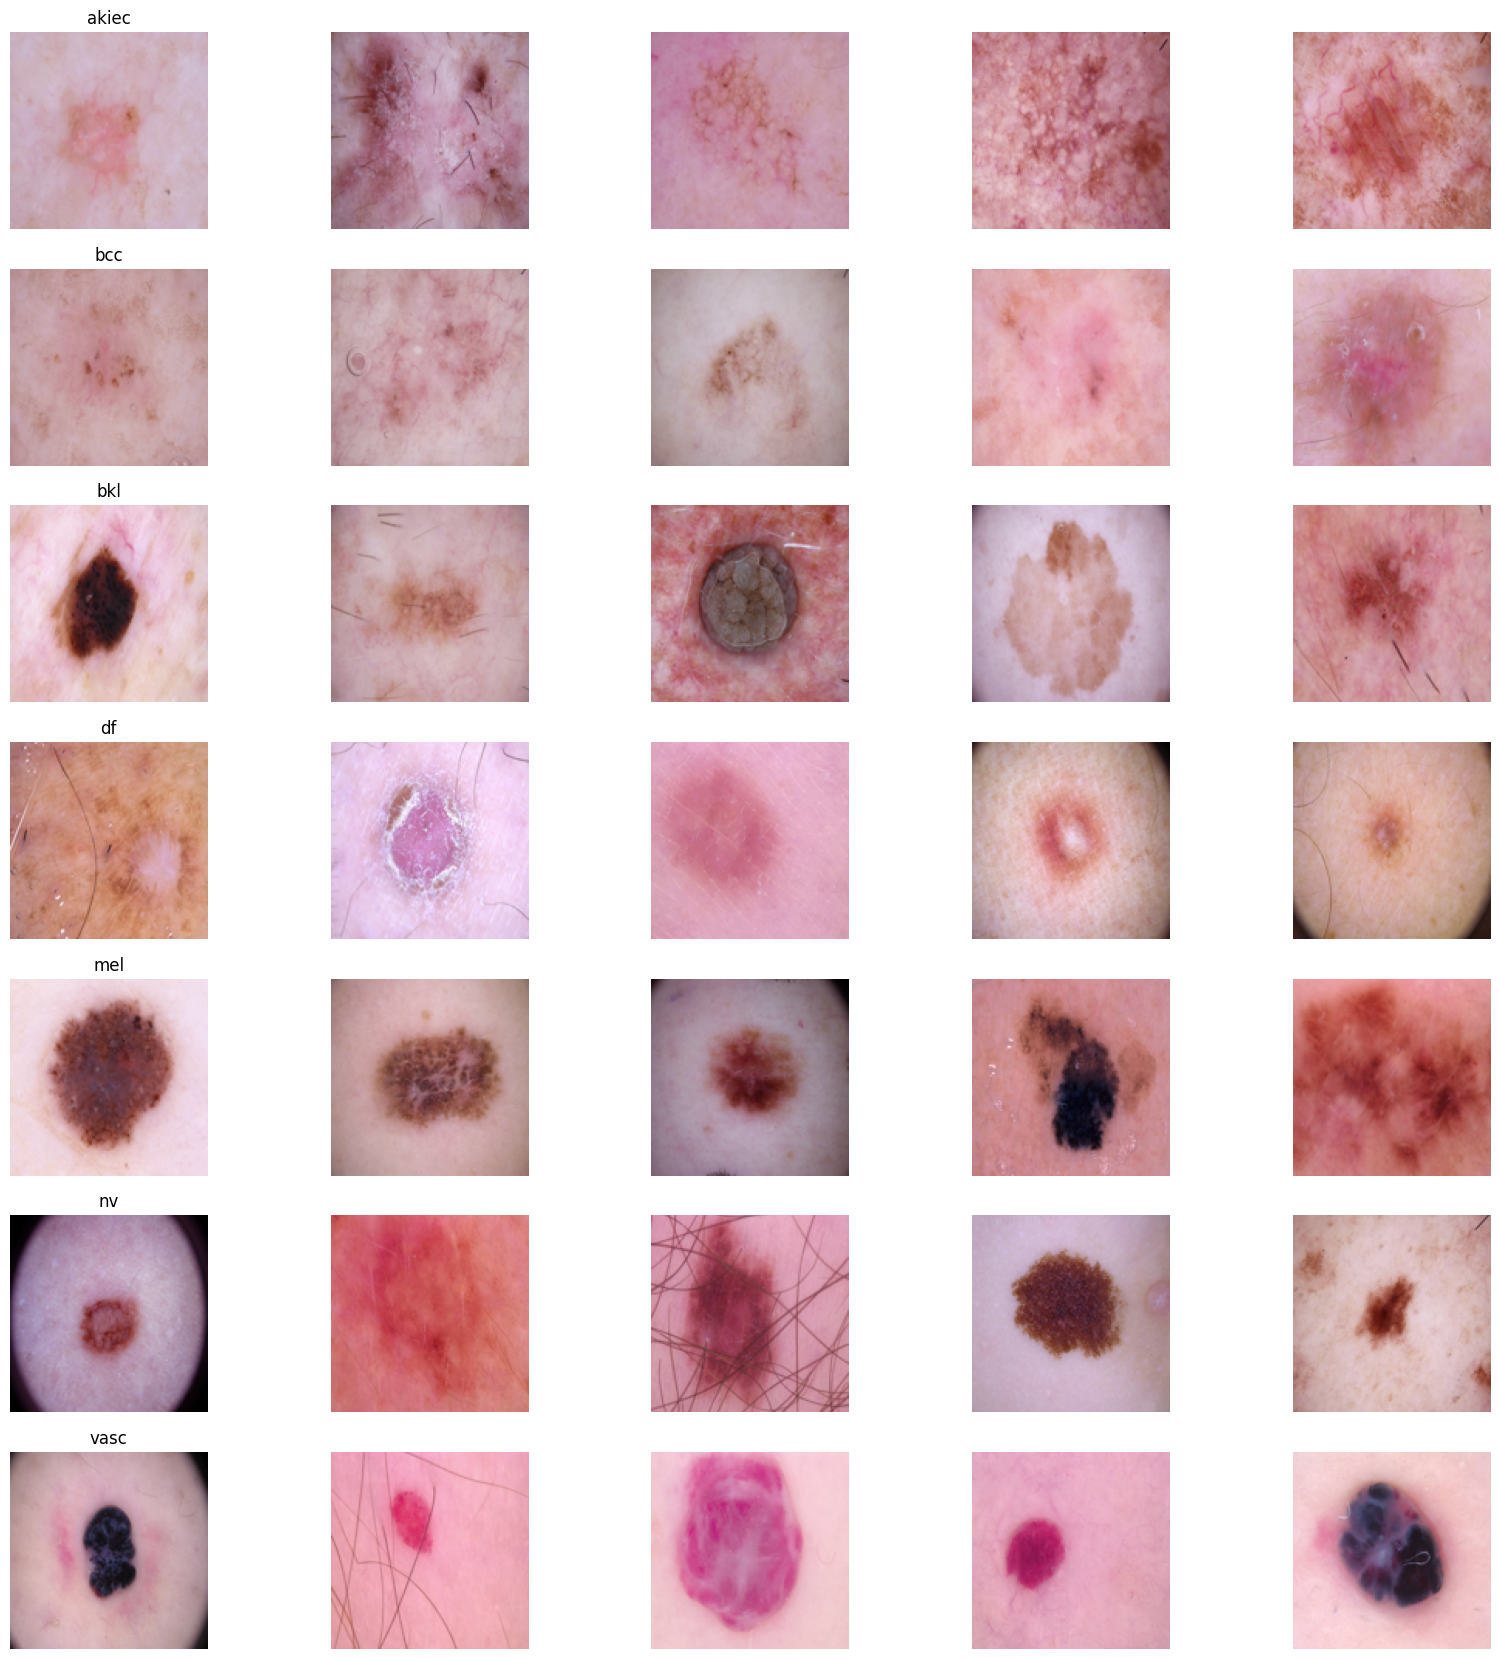

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

# Read CSV file
skin_df = pd.read_csv('/content/HAM10000_metadata.csv')

# Create a dictionary to map image IDs to file paths
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('*', '*.jpg'))}

# Update 'path' column with the corresponding file path (or empty string if not found)
skin_df['path'] = skin_df['image_id'].map(lambda x: image_path.get(x, ''))

# Filter out rows with empty paths (missing images)
skin_df = skin_df[skin_df['path'] != '']

# Use the path to read images
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Print value counts of different skin conditions
print(skin_df['dx'].value_counts())

# Number of samples for plotting
n_samples = 5

# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))
for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

# Save the new DataFrame to a CSV file
skin_df.to_csv('/content/skin_df_updated.csv', index=False)

In [ ]:
file_path = '/content/skin_df_updated.csv'  # Update the file path if needed
df = pd.read_csv(file_path)

# Display the contents of the DataFrame
df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                      path  \
0  HAM10000_images_part_1/ISIC_0027419.jpg   
1  HAM10000_images_part_1/ISIC_0025030.jpg   
2  HAM10000_images_part_1/ISIC_0026769.jpg   
3  HAM10000_images_part_1/ISIC_0025661.jpg   
4  ham10000_images_part_2/ISIC_0031633.jpg   

                                               image  
0  [[[189 152 194]\n  [192 156 199]\n  [191 154 1...  
1  [[[24 13 22]\n  [24 14 22]\n  [25 14 26]\n  .....  
2  [[[187 127 135]\n  [190 134 146]\n  [193 136 1...  
3  [[[24 11 17]\n  [24 11 19]\n  [29 15 25]\n  .....  
4  [[[129  87 109]\n  [141  96 119]\n  [151 106 1...

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization                                     path  \
1617             face  ham10000_images_part_2/ISIC_0033272.jpg   
8128  lower extremity  ham10000_images_part_2/ISIC_0031923.jpg   
2168             back  HAM10000_ima

<ipython-input-10-7f0f110f099b>:55: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


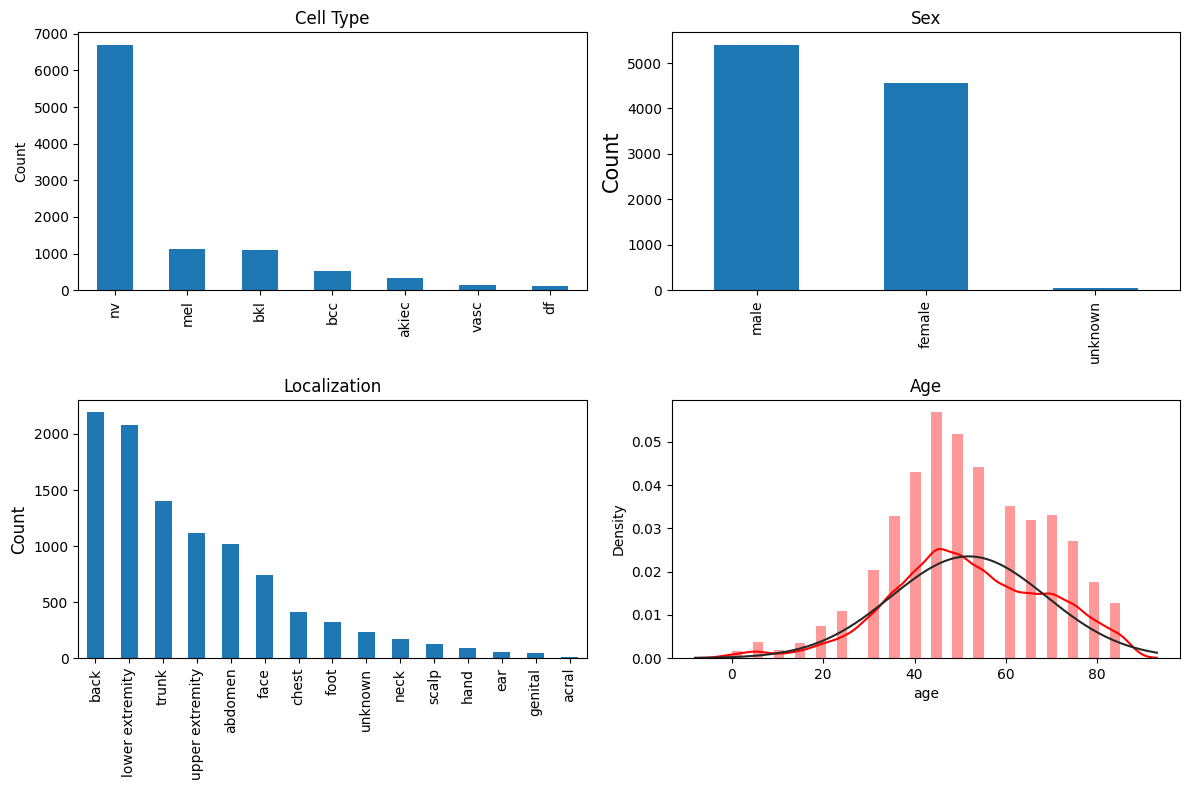

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


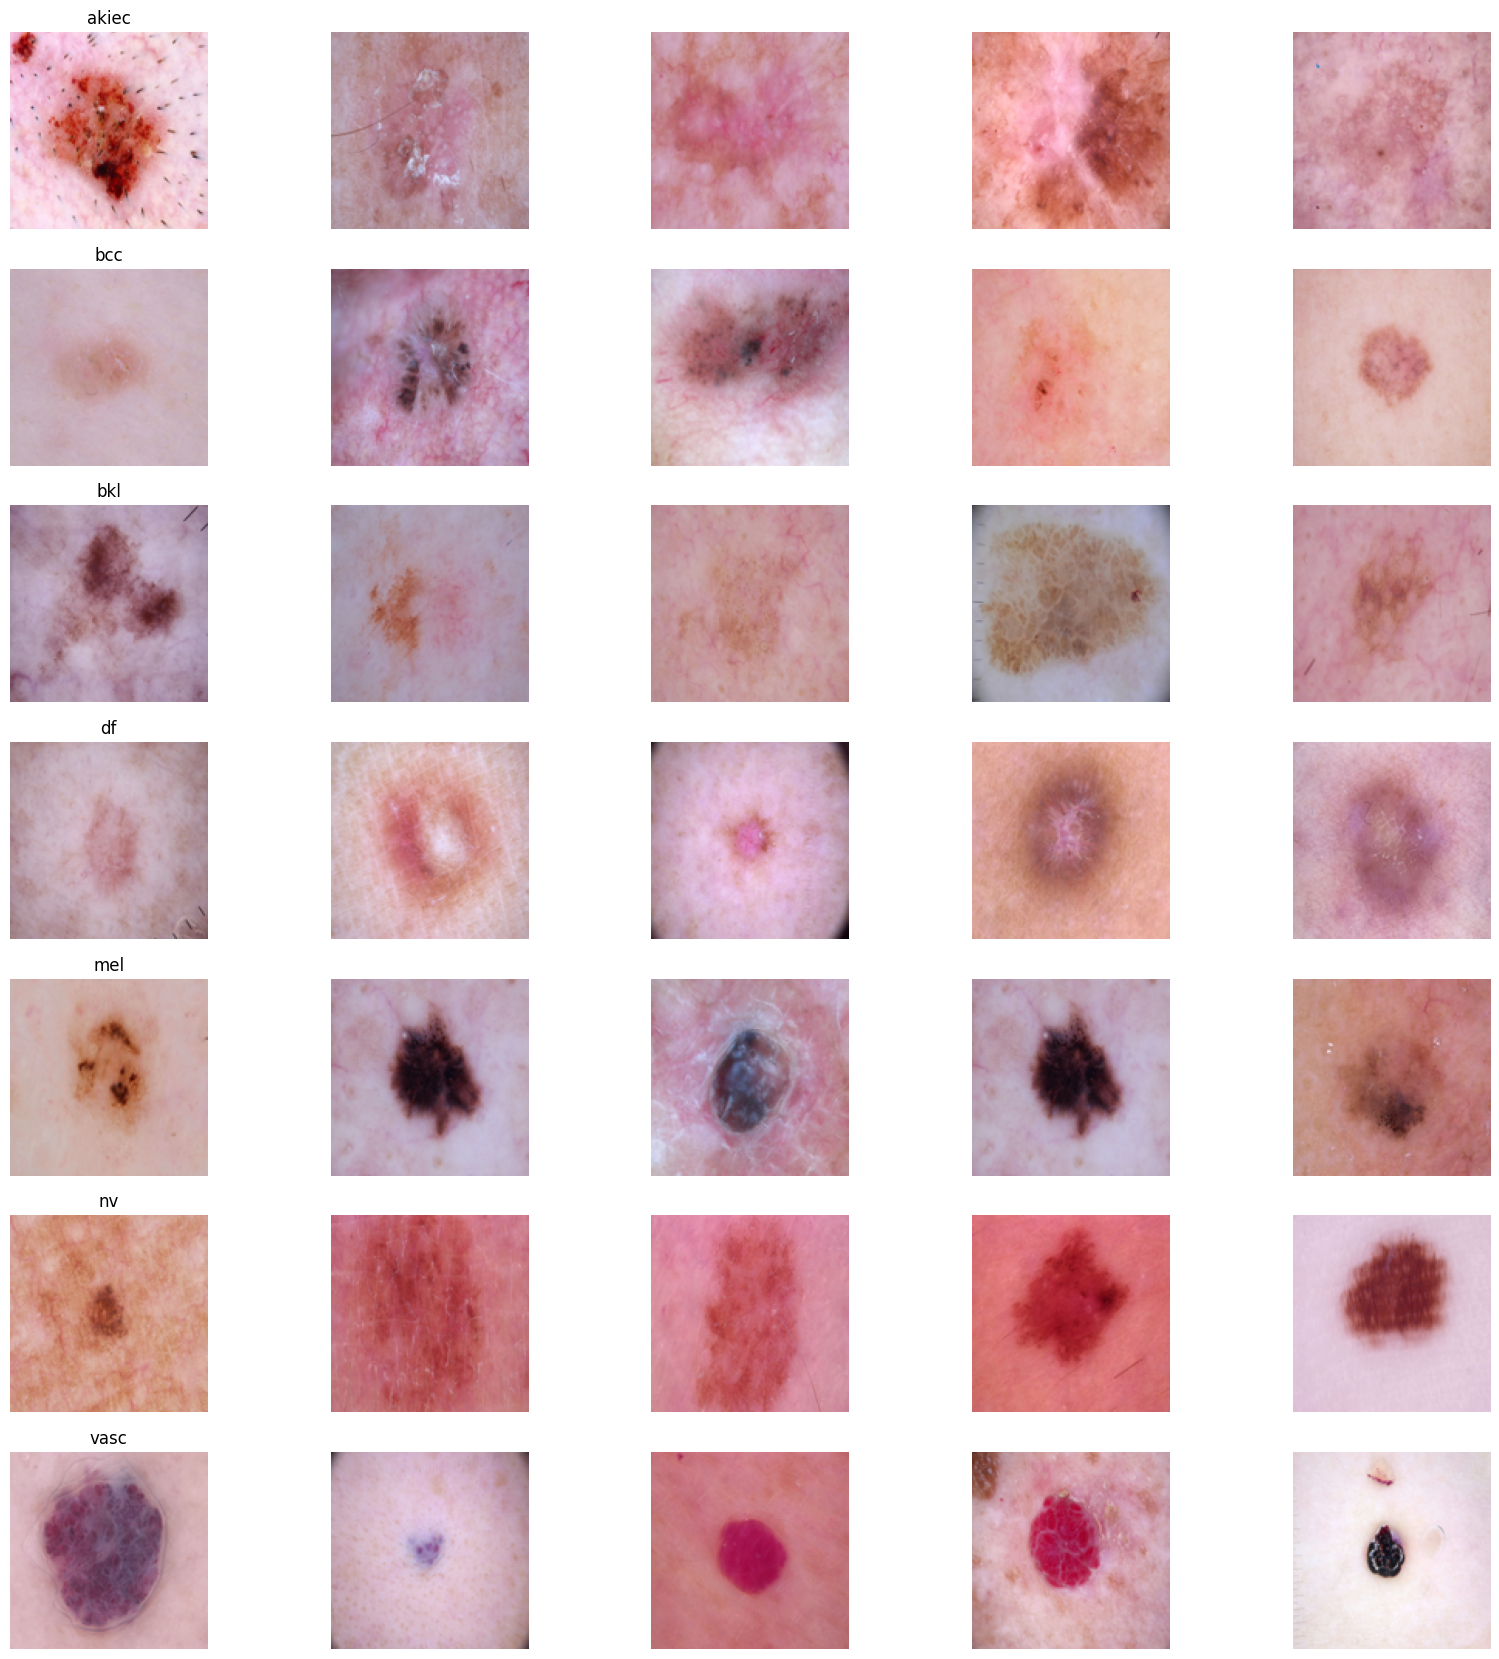

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from scipy import stats
from sklearn.preprocessing import LabelEncoder

skin_df = pd.read_csv('/content/skin_df_updated.csv')

SIZE=128

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))


# Data distribution visualization
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()


# Distribution of data into various classes
from sklearn.utils import resample
print(skin_df['label'].value_counts())

#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

#Check the distribution. All classes should be balanced now.
print(skin_df_balanced['label'].value_counts())


#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path1 = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/HAM10000_images_part_1', '*.jpg'))}

image_path2 = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/HAM10000_images_part_2', '*.jpg'))}
image_path = {}
image_path.update(image_path1)
image_path.update(image_path2)

#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

# Model Creation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
num_classes = 7
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

In [ ]:
batch_size = 15
epochs = 25

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

Epoch 1/25
175/175 - 18s - loss: 0.4074 - accuracy: 0.2160 - val_loss: 0.4040 - val_accuracy: 0.3051 - 18s/epoch - 105ms/step
Epoch 2/25


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/TestImages/ISIC_0024315.jpg',target_size=(128,128))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
def printRes(pred):
    if pred == 0:
        return 'akiec'
    elif pred == 1:
        return 'bcc'
    elif pred == 2:
        return 'bkl'
    elif pred == 3:
        return 'df'
    elif pred == 4:
        return 'mel'
    elif pred == 5:
        return 'nv'
    elif pred == 6:
        return 'vasc'

# Assuming 'pred' is the prediction value
result = printRes(pred)
print(result)

# DenseNet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def conv_block(inputs, filters):
    x = layers.Conv2D(filters, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def dense_block(inputs, filters):
    x = layers.Dense(filters)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Define the model architecture
    x = conv_block(inputs, 32)
    x = layers.MaxPooling2D()(x)

    x = conv_block(x, 64)
    x = layers.MaxPooling2D()(x)

    x = conv_block(x, 128)
    x = layers.MaxPooling2D()(x)

    x = conv_block(x, 256)
    x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x)
    x = dense_block(x, 1024)
    x = layers.Dropout(0.5)(x)
    x = dense_block(x, 512)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create and compile the model
    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Define the input shape and number of classes for your dataset
input_shape = (128,128, 3)
num_classes = 7

# Build the model
model = build_model(input_shape, num_classes)
model.summary()


In [ ]:
batch_size = 24
epochs = 25

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/ISIC_0024306.jpg',target_size=(128,128))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred_probs = model.predict(img1)
print("Predicted Probabilities:", pred_probs)
pred = np.argmax(pred_probs)

pred = np.argmax(model.predict(img1))
def printRes(pred):
    if pred == 0:
        return 'akiec'
    elif pred == 1:
        return 'bcc'
    elif pred == 2:
        return 'bkl'
    elif pred == 3:
        return 'df'
    elif pred == 4:
        return 'mel'
    elif pred == 5:
        return 'nv'
    elif pred == 6:
        return 'vasc'

# Assuming 'pred' is the prediction value
result = printRes(pred)
print(result)


1/1 [==============================] - 0s 22ms/step
Predicted Probabilities: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  4.6882374e-20 0.0000000e+00]]
1/1 [==============================] - 0s 18ms/step
vasc


In [ ]:
# Assuming you have a DataFrame 'skin_df_balanced'
selected_labels = [6]
selected_rows = skin_df_balanced[skin_df_balanced['label'].isin(selected_labels)]

print(selected_rows[['label', 'dx']])


      label    dx
2422      6  vasc
2412      6  vasc
2334      6  vasc
2426      6  vasc
2391      6  vasc
...     ...   ...
2375      6  vasc
2436      6  vasc
2453      6  vasc
2377      6  vasc
2363      6  vasc

[500 rows x 2 columns]


# AlexNET

In [ ]:
# ALEXNET

from keras.layers import  Dropout
SIZE=128

ALEXNET = Sequential()

ALEXNET.add(Conv2D(64, kernel_size=(11, 11), activation='relu',strides=(4, 4), input_shape=(SIZE,SIZE,3)))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.2))

ALEXNET.add(MaxPool2D(pool_size=(3, 3),strides=(2, 2)))

ALEXNET.add(Conv2D(192, kernel_size=(5, 5),strides=(1, 1), activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.3))
ALEXNET.add(Conv2D(384, kernel_size=(3, 3),strides=(1, 1),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.2))
ALEXNET.add(Conv2D(256, kernel_size=(3, 3),strides=(1, 1),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.3))
ALEXNET.add(MaxPool2D(pool_size=(3, 3),strides=(2, 2)))

ALEXNET.add(Conv2D(256, kernel_size=(3, 3),strides=(2, 2),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.2))
ALEXNET.add(Conv2D(256, kernel_size=(3, 3),strides=(1, 1),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.3))
ALEXNET.add(MaxPool2D(pool_size=(1,1),strides=(2, 2)))





ALEXNET.add(Flatten())
ALEXNET.add(Dense(4096, activation='relu'))
ALEXNET.add(Dropout(0.2))
ALEXNET.add(Dense(4096, activation='relu'))
ALEXNET.add(Dropout(0.3))
ALEXNET.add(Dense(7, activation='softmax'))

# Model Summary
ALEXNET.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 64)        23296     
                                                                 
 batch_normalization_24 (Ba  (None, 30, 30, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 192)       307392    
                                                                 
 batch_normalization_25 (Ba  (None, 14, 14, 192)      

In [ ]:
SIZE = 128
epochs = 50
batch_size = 8
LearningR=0.000003
n_samples = 500
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=LearningR, beta_1=0.9, beta_2=0.999,amsgrad=False)
ALEXNET.compile(optimizer=optimizer,loss="categorical_crossentropy", metrics=["accuracy"])
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.0001)
x_train, x_validate, y_train, y_validate = train_test_split(x_test, y_test, test_size=0.1, random_state=2)


Epoch 1/50
193/193 [==============================] - ETA: 0s - loss: 2.0255 - accuracy: 0.1526

193/193 [==============================] - 14s 51ms/step - loss: 2.0255 - accuracy: 0.1526 - val_loss: 1.9652 - val_accuracy: 0.1686 - lr: 3.0000e-06
Epoch 2/50
192/193 [============================>.] - ETA: 0s - loss: 1.9575 - accuracy: 0.2115

193/193 [==============================] - 9s 44ms/step - loss: 1.9583 - accuracy: 0.2110 - val_loss: 2.0054 - val_accuracy: 0.1744 - lr: 3.0000e-06
Epoch 3/50
193/193 [==============================] - ETA: 0s - loss: 1.8906 - accuracy: 0.2429

193/193 [==============================] - 9s 44ms/step - loss: 1.8906 - accuracy: 0.2429 - val_loss: 1.8600 - val_accuracy: 0.2791 - lr: 3.0000e-06
Epoch 4/50
192/193 [============================>.] - ETA: 0s - loss: 1.8333 - accuracy: 0.2454

193/193 [==============================] - 7s 38ms/step - loss: 1.8336 - accuracy: 0.2448 - val_loss: 1.6646 - val_accuracy: 0.3895 - lr: 3.0000e-06
Epoch 5/50
193/193 [==============================] - ETA: 0s - loss: 1.7934 - accuracy: 0.2942

193/193 [==============================] - 8s 44ms/step - loss: 1.7934 - accuracy: 0.2942 - val_loss: 1.5736 - val_accuracy: 0.4244 - lr: 3.0000e-06
Epoch 6/50
193/193 [==============================] - ETA: 0s - loss: 1.7891 - accuracy: 0.3032

193/193 [==============================] - 8s 42ms/step - loss: 1.7891 - accuracy: 0.3032 - val_loss: 1.5263 - val_accuracy: 0.4360 - lr: 3.0000e-06
Epoch 7/50
193/193 [==============================] - ETA: 0s - loss: 1.7644 - accuracy: 0.3117

193/193 [==============================] - 7s 39ms/step - loss: 1.7644 - accuracy: 0.3117 - val_loss: 1.5036 - val_accuracy: 0.4709 - lr: 3.0000e-06
Epoch 8/50
192/193 [============================>.] - ETA: 0s - loss: 1.7525 - accuracy: 0.3179

193/193 [==============================] - 9s 45ms/step - loss: 1.7520 - accuracy: 0.3188 - val_loss: 1.5092 - val_accuracy: 0.4419 - lr: 3.0000e-06
Epoch 9/50
193/193 [==============================] - ETA: 0s - loss: 1.7124 - accuracy: 0.3266

193/193 [==============================] - 8s 43ms/step - loss: 1.7124 - accuracy: 0.3266 - val_loss: 1.4871 - val_accuracy: 0.4826 - lr: 3.0000e-06
Epoch 10/50
193/193 [==============================] - ETA: 0s - loss: 1.7171 - accuracy: 0.3169

193/193 [==============================] - 7s 37ms/step - loss: 1.7171 - accuracy: 0.3169 - val_loss: 1.4596 - val_accuracy: 0.4651 - lr: 3.0000e-06
Epoch 11/50
193/193 [==============================] - ETA: 0s - loss: 1.6756 - accuracy: 0.3357

193/193 [==============================] - 9s 44ms/step - loss: 1.6756 - accuracy: 0.3357 - val_loss: 1.4494 - val_accuracy: 0.4942 - lr: 3.0000e-06
Epoch 12/50
192/193 [============================>.] - ETA: 0s - loss: 1.6511 - accuracy: 0.3616

193/193 [==============================] - 7s 36ms/step - loss: 1.6495 - accuracy: 0.3630 - val_loss: 1.4599 - val_accuracy: 0.4593 - lr: 3.0000e-06
Epoch 13/50
192/193 [============================>.] - ETA: 0s - loss: 1.6521 - accuracy: 0.3773

193/193 [==============================] - 9s 45ms/step - loss: 1.6545 - accuracy: 0.3760 - val_loss: 1.4269 - val_accuracy: 0.4826 - lr: 3.0000e-06
Epoch 14/50
193/193 [==============================] - ETA: 0s - loss: 1.5871 - accuracy: 0.3935

193/193 [==============================] - 9s 45ms/step - loss: 1.5871 - accuracy: 0.3935 - val_loss: 1.4131 - val_accuracy: 0.4651 - lr: 3.0000e-06
Epoch 15/50
192/193 [============================>.] - ETA: 0s - loss: 1.6248 - accuracy: 0.3642

193/193 [==============================] - 7s 37ms/step - loss: 1.6239 - accuracy: 0.3636 - val_loss: 1.3977 - val_accuracy: 0.4826 - lr: 3.0000e-06
Epoch 16/50
192/193 [============================>.] - ETA: 0s - loss: 1.5790 - accuracy: 0.3825

193/193 [==============================] - 7s 37ms/step - loss: 1.5806 - accuracy: 0.3825 - val_loss: 1.3943 - val_accuracy: 0.4942 - lr: 3.0000e-06
Epoch 17/50
193/193 [==============================] - ETA: 0s - loss: 1.5988 - accuracy: 0.3942

193/193 [==============================] - 9s 45ms/step - loss: 1.5988 - accuracy: 0.3942 - val_loss: 1.4127 - val_accuracy: 0.4709 - lr: 3.0000e-06
Epoch 18/50
193/193 [==============================] - ETA: 0s - loss: 1.5429 - accuracy: 0.4045

193/193 [==============================] - 7s 37ms/step - loss: 1.5429 - accuracy: 0.4045 - val_loss: 1.3668 - val_accuracy: 0.4767 - lr: 3.0000e-06
Epoch 19/50
192/193 [============================>.] - ETA: 0s - loss: 1.5189 - accuracy: 0.4119

193/193 [==============================] - 7s 36ms/step - loss: 1.5164 - accuracy: 0.4130 - val_loss: 1.3675 - val_accuracy: 0.5000 - lr: 3.0000e-06
Epoch 20/50
193/193 [==============================] - ETA: 0s - loss: 1.5275 - accuracy: 0.3948

193/193 [==============================] - 9s 44ms/step - loss: 1.5275 - accuracy: 0.3948 - val_loss: 1.3929 - val_accuracy: 0.4651 - lr: 3.0000e-06
Epoch 21/50
193/193 [==============================] - ETA: 0s - loss: 1.5168 - accuracy: 0.4162

193/193 [==============================] - 9s 45ms/step - loss: 1.5168 - accuracy: 0.4162 - val_loss: 1.3529 - val_accuracy: 0.5058 - lr: 3.0000e-06
Epoch 22/50
192/193 [============================>.] - ETA: 0s - loss: 1.4720 - accuracy: 0.4217

193/193 [==============================] - 7s 37ms/step - loss: 1.4741 - accuracy: 0.4221 - val_loss: 1.3471 - val_accuracy: 0.4593 - lr: 3.0000e-06
Epoch 23/50
192/193 [============================>.] - ETA: 0s - loss: 1.4805 - accuracy: 0.4315

193/193 [==============================] - 9s 44ms/step - loss: 1.4806 - accuracy: 0.4305 - val_loss: 1.3645 - val_accuracy: 0.4709 - lr: 3.0000e-06
Epoch 24/50
193/193 [==============================] - ETA: 0s - loss: 1.4813 - accuracy: 0.4266

193/193 [==============================] - 10s 50ms/step - loss: 1.4813 - accuracy: 0.4266 - val_loss: 1.3305 - val_accuracy: 0.4884 - lr: 3.0000e-06
Epoch 25/50
193/193 [==============================] - ETA: 0s - loss: 1.4573 - accuracy: 0.4136

193/193 [==============================] - 8s 41ms/step - loss: 1.4573 - accuracy: 0.4136 - val_loss: 1.3285 - val_accuracy: 0.4535 - lr: 3.0000e-06
Epoch 26/50
193/193 [==============================] - ETA: 0s - loss: 1.4407 - accuracy: 0.4294

193/193 [==============================] - 8s 44ms/step - loss: 1.4407 - accuracy: 0.4294 - val_loss: 1.3147 - val_accuracy: 0.5000 - lr: 3.0000e-06
Epoch 27/50
193/193 [==============================] - ETA: 0s - loss: 1.4472 - accuracy: 0.4325

193/193 [==============================] - 10s 51ms/step - loss: 1.4472 - accuracy: 0.4325 - val_loss: 1.3055 - val_accuracy: 0.5058 - lr: 3.0000e-06
Epoch 28/50
193/193 [==============================] - ETA: 0s - loss: 1.4088 - accuracy: 0.4610

193/193 [==============================] - 9s 47ms/step - loss: 1.4088 - accuracy: 0.4610 - val_loss: 1.2620 - val_accuracy: 0.5116 - lr: 3.0000e-06
Epoch 29/50
192/193 [============================>.] - ETA: 0s - loss: 1.4169 - accuracy: 0.4595

193/193 [==============================] - 8s 43ms/step - loss: 1.4174 - accuracy: 0.4597 - val_loss: 1.2558 - val_accuracy: 0.5698 - lr: 3.0000e-06
Epoch 30/50
192/193 [============================>.] - ETA: 0s - loss: 1.4213 - accuracy: 0.4634

193/193 [==============================] - 10s 50ms/step - loss: 1.4199 - accuracy: 0.4636 - val_loss: 1.2716 - val_accuracy: 0.5174 - lr: 3.0000e-06
Epoch 31/50
193/193 [==============================] - ETA: 0s - loss: 1.4120 - accuracy: 0.4506

193/193 [==============================] - 10s 50ms/step - loss: 1.4120 - accuracy: 0.4506 - val_loss: 1.2761 - val_accuracy: 0.5407 - lr: 3.0000e-06
Epoch 32/50
193/193 [==============================] - ETA: 0s - loss: 1.3834 - accuracy: 0.4773

193/193 [==============================] - 9s 45ms/step - loss: 1.3834 - accuracy: 0.4773 - val_loss: 1.2865 - val_accuracy: 0.5233 - lr: 3.0000e-06
Epoch 33/50
193/193 [==============================] - ETA: 0s - loss: 1.4000 - accuracy: 0.4526

193/193 [==============================] - 9s 48ms/step - loss: 1.4000 - accuracy: 0.4526 - val_loss: 1.3268 - val_accuracy: 0.5116 - lr: 3.0000e-06
Epoch 34/50
193/193 [==============================] - ETA: 0s - loss: 1.3533 - accuracy: 0.4812

193/193 [==============================] - 10s 51ms/step - loss: 1.3533 - accuracy: 0.4812 - val_loss: 1.2681 - val_accuracy: 0.5349 - lr: 3.0000e-06
Epoch 35/50
193/193 [==============================] - ETA: 0s - loss: 1.3923 - accuracy: 0.4539

193/193 [==============================] - 9s 47ms/step - loss: 1.3923 - accuracy: 0.4539 - val_loss: 1.2791 - val_accuracy: 0.5349 - lr: 3.0000e-06
Epoch 36/50
192/193 [============================>.] - ETA: 0s - loss: 1.3849 - accuracy: 0.4772

193/193 [==============================] - 9s 46ms/step - loss: 1.3856 - accuracy: 0.4773 - val_loss: 1.2613 - val_accuracy: 0.5291 - lr: 3.0000e-06
Epoch 37/50
193/193 [==============================] - ETA: 0s - loss: 1.3731 - accuracy: 0.4617

193/193 [==============================] - 10s 51ms/step - loss: 1.3731 - accuracy: 0.4617 - val_loss: 1.2577 - val_accuracy: 0.5465 - lr: 3.0000e-06
Epoch 38/50
193/193 [==============================] - ETA: 0s - loss: 1.3455 - accuracy: 0.4773

193/193 [==============================] - 10s 51ms/step - loss: 1.3455 - accuracy: 0.4773 - val_loss: 1.2415 - val_accuracy: 0.5523 - lr: 3.0000e-06
Epoch 39/50
193/193 [==============================] - ETA: 0s - loss: 1.3537 - accuracy: 0.4799

193/193 [==============================] - 8s 42ms/step - loss: 1.3537 - accuracy: 0.4799 - val_loss: 1.2434 - val_accuracy: 0.5465 - lr: 3.0000e-06
Epoch 40/50
192/193 [============================>.] - ETA: 0s - loss: 1.3650 - accuracy: 0.4778

193/193 [==============================] - 9s 49ms/step - loss: 1.3659 - accuracy: 0.4773 - val_loss: 1.2677 - val_accuracy: 0.5233 - lr: 3.0000e-06
Epoch 41/50
192/193 [============================>.] - ETA: 0s - loss: 1.3738 - accuracy: 0.4713

193/193 [==============================] - 10s 51ms/step - loss: 1.3723 - accuracy: 0.4727 - val_loss: 1.2699 - val_accuracy: 0.5698 - lr: 3.0000e-06
Epoch 42/50
193/193 [==============================] - ETA: 0s - loss: 1.3538 - accuracy: 0.4727

193/193 [==============================] - 9s 49ms/step - loss: 1.3538 - accuracy: 0.4727 - val_loss: 1.2666 - val_accuracy: 0.5581 - lr: 3.0000e-06
Epoch 43/50
192/193 [============================>.] - ETA: 0s - loss: 1.3216 - accuracy: 0.4837

193/193 [==============================] - 8s 43ms/step - loss: 1.3227 - accuracy: 0.4825 - val_loss: 1.3349 - val_accuracy: 0.5116 - lr: 3.0000e-06
Epoch 44/50
192/193 [============================>.] - ETA: 0s - loss: 1.3497 - accuracy: 0.4817

193/193 [==============================] - 10s 51ms/step - loss: 1.3519 - accuracy: 0.4799 - val_loss: 1.2745 - val_accuracy: 0.5523 - lr: 3.0000e-06
Epoch 45/50
193/193 [==============================] - ETA: 0s - loss: 1.3229 - accuracy: 0.4877

193/193 [==============================] - 10s 51ms/step - loss: 1.3229 - accuracy: 0.4877 - val_loss: 1.2760 - val_accuracy: 0.5407 - lr: 3.0000e-06
Epoch 46/50
193/193 [==============================] - ETA: 0s - loss: 1.3024 - accuracy: 0.4974

193/193 [==============================] - 8s 42ms/step - loss: 1.3024 - accuracy: 0.4974 - val_loss: 1.2932 - val_accuracy: 0.5349 - lr: 3.0000e-06
Epoch 47/50
193/193 [==============================] - ETA: 0s - loss: 1.3352 - accuracy: 0.5032

193/193 [==============================] - 10s 51ms/step - loss: 1.3352 - accuracy: 0.5032 - val_loss: 1.2780 - val_accuracy: 0.5407 - lr: 3.0000e-06
Epoch 48/50
193/193 [==============================] - ETA: 0s - loss: 1.3160 - accuracy: 0.4968

193/193 [==============================] - 10s 51ms/step - loss: 1.3160 - accuracy: 0.4968 - val_loss: 1.2735 - val_accuracy: 0.5233 - lr: 3.0000e-06
Epoch 49/50
192/193 [============================>.] - ETA: 0s - loss: 1.3372 - accuracy: 0.4824

193/193 [==============================] - 8s 42ms/step - loss: 1.3353 - accuracy: 0.4831 - val_loss: 1.2612 - val_accuracy: 0.5407 - lr: 3.0000e-06
Epoch 50/50
193/193 [==============================] - ETA: 0s - loss: 1.2860 - accuracy: 0.5169

6/6 [==============================] - 0s 15ms/step - loss: 1.2394 - accuracy: 0.5465
Validation: accuracy = 0.546512  ;  loss_v = 1.239383
Test: accuracy = 0.509714  ;  loss = 1.320133


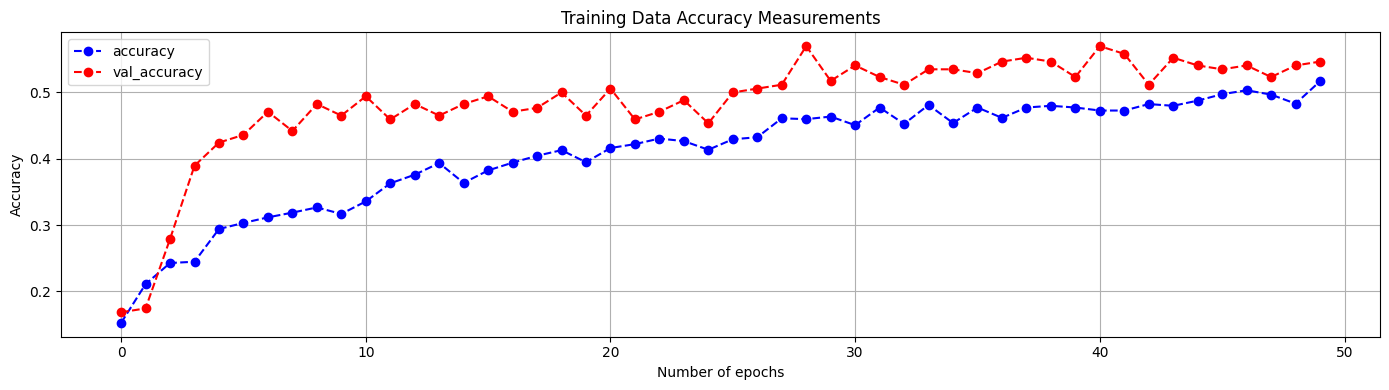

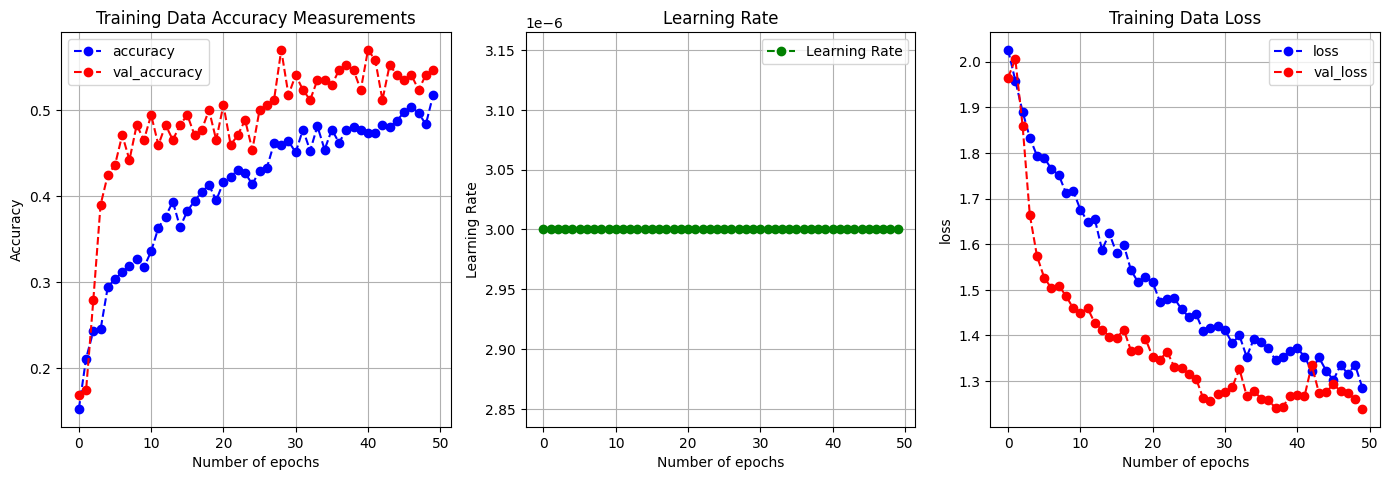

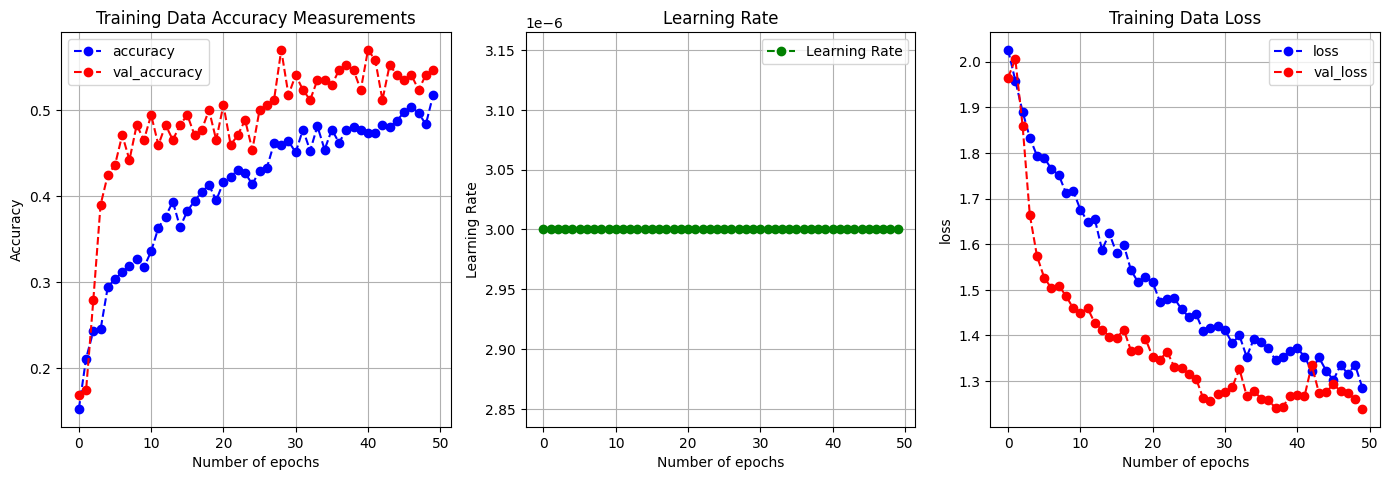

In [ ]:
# Fit the model
# With data augmentation to prevent overfitting

# Görüntü verilerini düzenlemek, büyütmek veya küçültmek ve...
# ...bunları buna karşılık eğitim örneklerini düzenle
from keras.preprocessing.image import ImageDataGenerator
# Rastgele döndürme, rastgele büyütme ve küçültme,...
# ... rastgele çeviri ve rastgele ters çevirme gibi
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=20,
    zoom_range=0.2,  # Randomly zoom image
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.2,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.2,
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


datagen.fit(x_train)
# Öğrenme sürecini başlat
# epochs=epochs değişkeni, modelin veri setini kaç kez türetmesi gerektiğini belirtir.
# validation_data=(x_validate, y_validate) değişkeni, modelin doğrulama yinelemeleri sırasında kullanması gereken doğrulama veri setini belirtir.
# verbose=1 değişkeni, öğrenme sürecinin ayrıntılı ayrıntılarını göstermek için ayarlanır.
# steps_per_epoch=x_train.shape[0] // batch_size değişkeni, bir eğitim yinelemesinde kaç adım (örnekler) olması gerektiğini belirtir.
# callbacks=[learning_rate_reduction] değişkeni, öğrenme oranı düşürmeye yönelik bir geri çağırma (callback) işlevini belirtir. Bu, modelin öğrenme oranını doğruluk iyileştirmesi durumunda düşürmesine olanak tanır.

history = ALEXNET.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                                epochs=epochs, validation_data=(x_validate, y_validate),verbose=1, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])
# ALEXNET modelinin doğruluk yüzdesini hesaplamak için kullanılabilecek gerçek etiketler (y_validate) ve tahmin edilen etiketler (Y_pred) arasındaki ilişkiyi analiz etmenize olanak tanır.
Y_pred = ALEXNET.predict(x_validate)

# Convert predictions classes to one hot vectors
# tahmin edilen etiketlerin dizisinden, her örnek için en olası etiketi bulur.
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
# gerçek etiketlerin dizisinden, her örnek için en olası etiketi bulur.
Y_true = np.argmax(y_validate, axis=1)

loss, accuracy = ALEXNET.evaluate(x_test, y_test, verbose=1)

# modelinin doğrulama verileriyle ilgili doğruluk yüzdesini ve kayıp yüzdesini hesapla
loss_v, accuracy_v = ALEXNET.evaluate(x_validate, y_validate, verbose=1)

print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
ALEXNET.save("ALEXNET01.h5")

def accuracyPlot(history):
    fig = plt.figure(figsize=(14,4))

    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
accuracyPlot(history)

accuracy_lr_loss_plot(history)

# plot accuracy and loss Function
# eğitim ve test aşamaları arasındaki hata katsayılarını ve doğruluk değerleri
def accuracy_lr_loss_plot (history):
    fig = plt.figure(figsize=(14,9))

    plt.subplot(231)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(232)
    plt.plot(history.history['lr'], 'go--', label="Learning Rate")
    plt.title("Learning Rate")
    plt.xlabel("Number of epochs")
    plt.ylabel("Learning Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(233)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

accuracy_lr_loss_plot(history)

In [ ]:
# plot accuracy and loss Function
# eğitim ve test aşamaları arasındaki hata katsayılarını ve doğruluk değerleri
def accuracy_lr_loss_plot (history):
    fig = plt.figure(figsize=(14,9))

    plt.subplot(231)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(232)
    plt.plot(history.history['lr'], 'go--', label="Learning Rate")
    plt.title("Learning Rate")
    plt.xlabel("Number of epochs")
    plt.ylabel("Learning Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(233)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

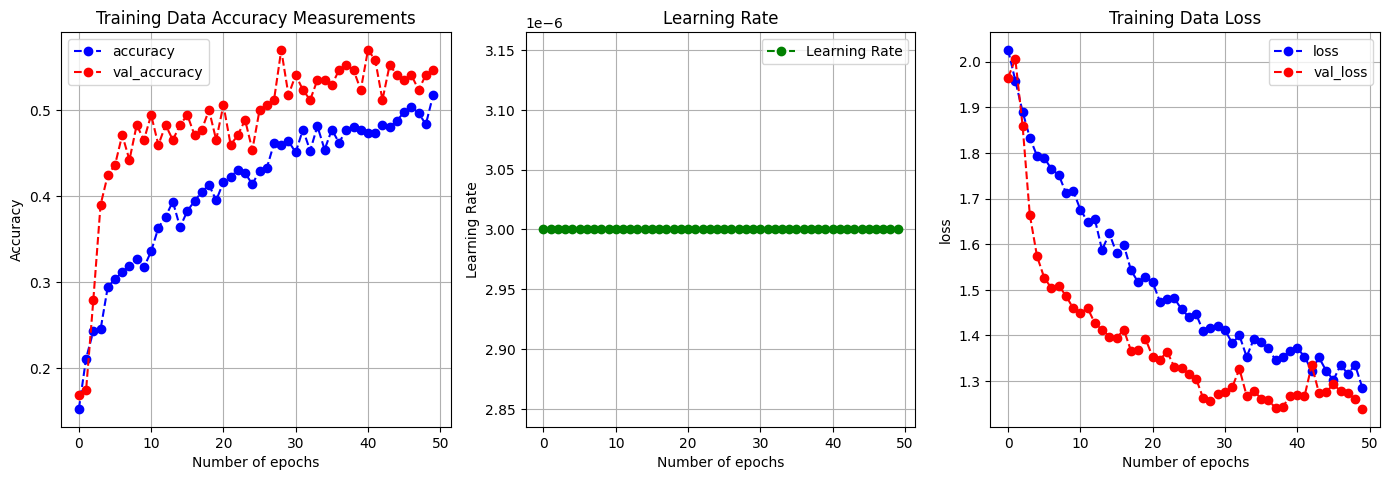

In [ ]:
`accuracy_lr_loss_plot(history)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/ISIC_0024306.jpg',target_size=(128,128))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred_probs = model.predict(img1)
print("Predicted Probabilities:", pred_probs)
pred = np.argmax(pred_probs)

pred = np.argmax(model.predict(img1))
def printRes(pred):
    if pred == 0:
        return 'akiec'
    elif pred == 1:
        return 'bcc'
    elif pred == 2:
        return 'bkl'
    elif pred == 3:
        return 'df'
    elif pred == 4:
        return 'mel'
    elif pred == 5:
        return 'nv'
    elif pred == 6:
        return 'vasc'

# Assuming 'pred' is the prediction value
result = printRes(pred)
print(result)

NameError: ignored